# TASK 18

**The task is to perform statistical analysis using this dataset. https://www.kaggle.com/datasets/abrambeyer/openintro-possum. To document in detail, the interpretation of the results from all the measures of centre, all measures of spread,  and outlier detection mechanisms. And to be intuitive about the statistical insight and information that can be getton from the data.**

In [1]:
# importing libries
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

# load the data
df=pd.read_csv("possum.csv")

### Checking the snapshot of the data

In [2]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
df.tail()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


### Let check and clean the data if needed

In [5]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [6]:
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [7]:
# let fill the missing values with mean

# for age with 2 missing value
df['age']=df['age'].fillna(df['age'].mean())

# for footlght with 1 missing value
df['footlgth']=df['footlgth'].fillna(df['footlgth'].mean())


In [9]:
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [ ]:
# let check for duplicate if exist
df.duplicated().sum() 

# Standardize gender data for any case mistyped
df[df['sex']==df['sex'].str.upper()] #checking
# df['sex'] = df['sex'].str.lower().str.strip()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly


In [16]:
# Make sure each column has the correct type (int, float, object, datetime)
df.dtypes

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

### My focus will be on Sex, totlngth (total lenght), tail, footlgth (foot lenght),  and eyes

In [17]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [ ]:
# I will like to rename some column for clearity
df.rename(columns={ 
    'totlngth':'total_length',
    'taill': 'tail',
    'footlgth': 'foot_length'
},inplace=True)

In [59]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw',
       'total_length', 'tail', 'foot_length', 'earconch', 'eye', 'chest',
       'belly'],
      dtype='object')

In [76]:

# let extract only the column I want to focus on
focus_df=df[['sex','total_length','tail','foot_length','eye']]
focus_df.head(2)

,sex,total_length,tail,foot_length,eye
0,m,89.0,36.0,74.5,15.2
1,f,91.5,36.5,72.5,16.0


### Check for outliers from the data

In [ ]:
# first let check data description and look out for mean and median to know if our data is normally distributed
print("The Mean")
print (focus_df.groupby('sex').mean())
print("\nThe Median")
print(focus_df.groupby('sex').median())


The Mean
     total_length       tail  foot_length        eye
sex                                                 
f       87.906977  37.104651    69.096726  14.811628
m       86.511475  36.942623    68.009836  15.211475

The Median
     total_length  tail  foot_length   eye
sex                                       
f            88.5  37.5         70.3  14.8
m            86.0  36.5         66.9  15.0


**we can see that our data is normally distributed, so let use boxplot to determine the outline.**

### Now it is time for me to group the data into male and female to check each of there features

#### Lets get the description for both gender by total length

Text(0.5, 0.98, '')

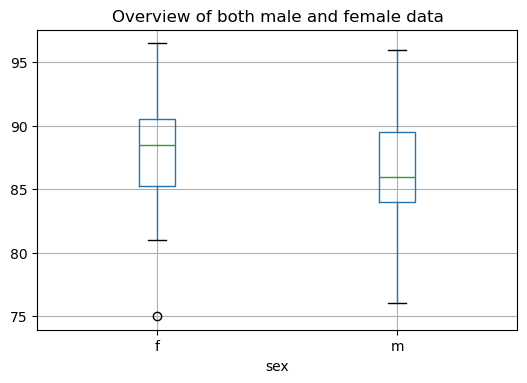

In [85]:
# let check for outliers first
focus_df.boxplot(column="total_length", by="sex", figsize=(6,4))
plt.title("Overview of both male and female data")
plt.suptitle("")

In [ ]:
# I can see outlier in female data.. Since we are going to be removing outliers for each column (features) if exist
# Then let create function to remove outlier

def remove_outliers(data):
    Q1= data.quatile(0.25)
    Q3= data.quatile(0.75)
    IQR= Q3 - Q1
    range= 1.5 * IQR
    lower_bound= Q1 - range
    upper_bound= Q3 + range
    new_data= data[(data>=lower_bound) & (data<=upper_bound)]
    return new_data


In [ ]:
# Lets get the description for each gender by total length
print( focus_df.groupby('sex')['total_length'].describe())

# displaying the median too
print("\nThe median of the data is: ")
female,male= focus_df.groupby('sex')['total_length'].median()
print(f"Male: {male}\nFemale: {female}")

# displaying the variance too
print("\nThe variance of the data is: ")
female,male= focus_df.groupby('sex')['total_length'].var().round(2)
print(f"Male: {male}\nFemale: {female}")

     count       mean       std   min    25%   50%   75%   max
sex                                                           
f     43.0  87.906977  4.182241  75.0  85.25  88.5  90.5  96.5
m     61.0  86.511475  4.339896  76.0  84.00  86.0  89.5  96.0

The median of the data is: 
Male: 86.0
Female: 88.5

The variance of the data is: 
Male: 18.83
Female: 17.49


#### Lets get the description for both gender by tail length/size

In [ ]:
# Lets get the description for both gender by tail length/size
print("\nThe description for both gender by tail length/size: ")
print( focus_df.groupby('sex')['tail'].describe())

# displaying the median too
print("\nThe median of the data is: ")
female,male= focus_df.groupby('sex')['tail'].median()
print(f"Male: {male}\nFemale: {female}")

# displaying the variance too
print("\nThe variance of the data is: ")
female,male= focus_df.groupby('sex')['tail'].var().round(2)
print(f"Male: {male}\nFemale: {female}")

     count       mean       std   min   25%   50%    75%   max
sex                                                           
f     43.0  37.104651  1.830815  32.0  36.0  37.5  38.25  41.0
m     61.0  36.942623  2.057706  32.0  35.5  36.5  38.00  43.0

The median of the data is: 
Male: 36.5
Female: 37.5

The variance of the data is: 
Male: 4.23
Female: 3.35


In [ ]:
# focus_df.groupby('sex').mean()
# focus_df.groupby('sex').median()
# focus_df.groupby('sex').var()

,total_length,tail,foot_length,eye
sex,,,,
f,17.491141,3.351883,23.556670,1.061052
m,18.834699,4.234153,15.855568,1.084033
